# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (np.shape(X_test)[1],np.shape(X_test)[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Below is visualization of random subset of German Traffic signs training set. 

- plotImages function was created for pretty image printing. 
- buildDistributionHist function is created for showing distribution trafic signs diagram

In [3]:
def getRandomImages(count, x, y):
    randomIndexes = np.random.randint(len(x), size = count)
    return [(a[0], a[1]) for a in zip(x[randomIndexes, ::], y[randomIndexes])], randomIndexes

def getImagesByIndexes(x, y, indexes = None):
    images = x[indexes, ::] if indexes != None else x
    labels = y[indexes] if indexes != None else x
    return [(a[0], a[1]) for a in zip(images, labels)]
    

In [4]:
#function for pretty images printing
def plotImages(images_to_labels, predictions = False, cols=3, sign_names=None):    
    rows = len(images_to_labels)//cols
    plt.figure(figsize=(cols*3,rows*2.5))
    i = 0
    for (image_file, label) in images_to_labels:
        plt.subplot(rows, cols, i+1)
        plt.imshow(image_file.squeeze(), cmap="gray")
        plt.xticks([])
        plt.yticks([])
        if sign_names is not None and not predictions:
            plt.text(0, image_file.shape[1] + 3, '{}: {}'.format(label, sign_names[label]), 
                     fontsize=12, color='k',backgroundcolor='w')        
        if sign_names is not None and predictions:
            plt.text(0, 0, 'Predicted: {}({})'.format(sign_names[label], label), 
                     fontsize=8, color='k', backgroundcolor='y')
        i = i + 1
    plt.show()

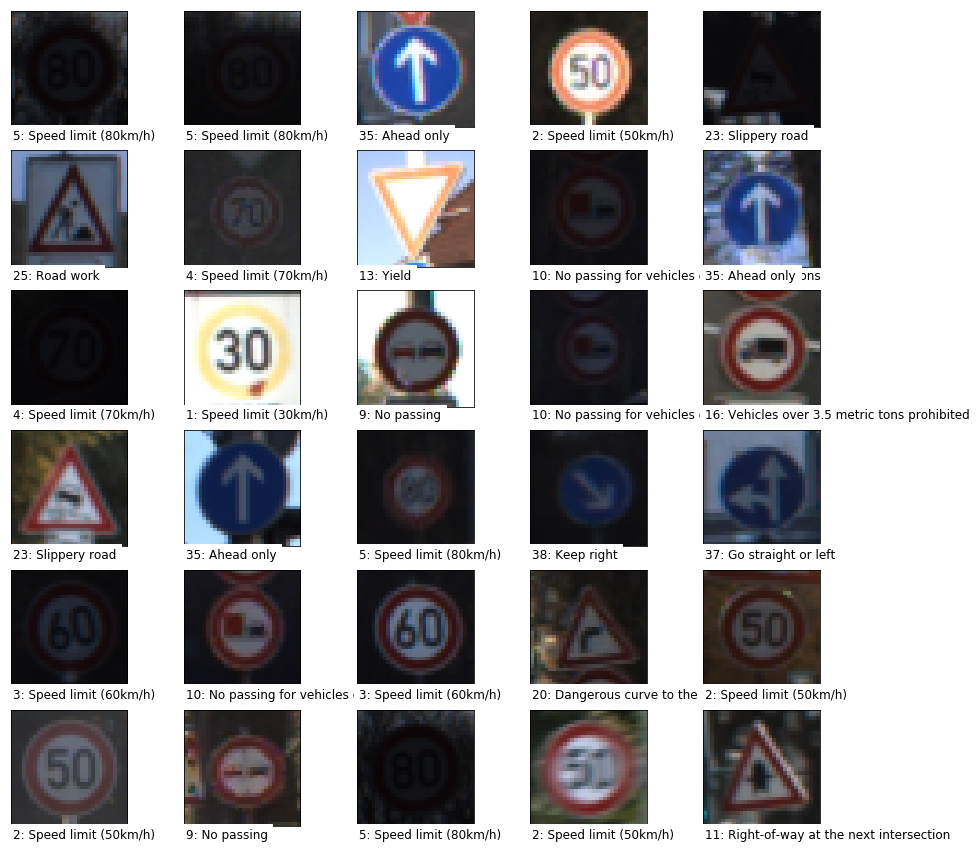

In [5]:
import pandas as pd

trafic_signs_names = pd.read_csv('signnames.csv', index_col=0)

#Show random images
image_data, randomIndexes = getRandomImages(30, X_train, y_train)
signNames = trafic_signs_names["SignName"].values
plotImages(image_data, cols=5, sign_names = signNames)



In [7]:
def buildDistributionHist(classIDs, title, num_classes):
    plt.figure(figsize=(15, 5))    
    plt.title(title)
    plt.xticks([i for i in range (0, num_classes)]);
    plt.hist(classIDs, bins=num_classes)
    plt.show()

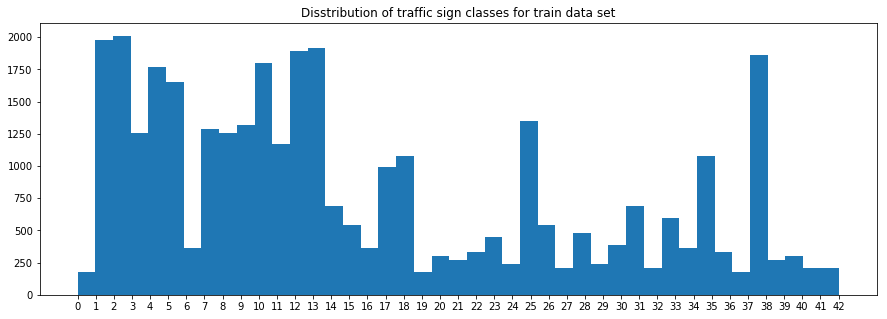

,SignName,Counts
ClassId,,
2,Speed limit (50km/h),2010
1,Speed limit (30km/h),1980
13,Yield,1920
12,Priority road,1890
38,Keep right,1860
10,No passing for vehicles over 3.5 metric tons,1800
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
25,Road work,1350


In [8]:
import pandas as pd

#Build hysto
buildDistributionHist(y_train, "Disstribution of traffic sign classes for training set", n_classes)

# Sorted classes
trafic_signs_names["Counts"] = [len(X_train[np.where(y_train == ind)]) for ind in range(0, n_classes)]
trafic_signs_names.sort_values('Counts', ascending=False)


### Expand Data Set (add new examples with random effects like rotate, zoom, blur)

For better learning and higer accuracy more sample train data was generated from existing images using random transformations. Transformation pipeline for each image is following:

- random rotation of image
- random scaling of image
- random warp of image
- random translation

Above techniques can help to imitate image distortions to improve training set and regularize network for work better with new examples

In [7]:
from sklearn.utils import shuffle
import cv2
import random
import matplotlib.pyplot as plt
from random import randint


def addGaussianNoise(image_in, noise_sigma):
    temp_image = np.float64(np.copy(image_in))

    h = temp_image.shape[0]
    w = temp_image.shape[1]
    d = temp_image.shape[2]
    noise = np.random.randn(h, w, d) * noise_sigma

    noisy_image = np.zeros(temp_image.shape, np.float64)
    noisy_image = temp_image + noise   
    
    return noisy_image

def randWarp(img, warp_degree = 0.06):
    
    rows = img.shape[0]    
    cols = img.shape[0]

    x_rand = np.random.rand(3) - 1/2
    x_rand *= cols * warp_degree   
    y_rand = np.random.rand(3) - 1/2
    y_rand *= rows * warp_degree

    x1 = cols * 1/4
    x2 = cols * 3/4
    y1 = rows * 1/4
    y2 = rows * 3/4

    M = cv2.getAffineTransform(np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]]),np.float32([[y1+y_rand[0],x1+x_rand[0]],
                       [y2+y_rand[1],x1+x_rand[1]],
                       [y1+y_rand[2],x2+x_rand[2]]]))
    return cv2.warpAffine(img,M,(cols,rows))[:,:,np.newaxis]  


def randScale(img, transform_limits = (-2,2)):   
    rows = img.shape[0]    
    cols = img.shape[0]
    px = np.random.randint(transform_limits[0],transform_limits[1])
    ending_loc = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    starting_loc = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    transformed = cv2.getPerspectiveTransform(ending_loc, starting_loc)
    dst = cv2.warpPerspective(img,transformed,(rows,cols))    
    return dst[:,:,np.newaxis]

def randTrans(img, translation_limit = 2):
    rows = img.shape[0]    
    cols = img.shape[0] 
    dx,dy = np.random.randint(-translation_limit,translation_limit,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))    
    return dst[:,:,np.newaxis]

def randRotate(img):    
    M = cv2.getRotationMatrix2D((int(img.shape[0]/2), int(img.shape[1]/2)), 30.0*np.random.rand()-15, 1.0)
    return cv2.warpAffine(img, M, img.shape[:2])

def blur(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def zoom(image, margin=0):
    image_dim = X_train.shape[1]
    xCenter = int(image.shape[0]/2)
    yCenter = int(image.shape[1]/2) 
    shift = int(image_dim/2-margin)
    image = image[(xCenter-shift):(xCenter+shift),(yCenter-shift):(yCenter+shift)]
    image = cv2.resize(image, (image_dim, image_dim))
    return image 

def generateNewExample(image):
    newimage = randRotate(image)
    newimage = randScale(newimage)
    newimage = newimage.reshape(newimage.shape[0], newimage.shape[1], 3)  
    newimage = randWarp(newimage)
    newimage = newimage.reshape(newimage.shape[0], newimage.shape[1], 3)
    newimage = randTrans(newimage)     
    return newimage.reshape(newimage.shape[0], newimage.shape[1], 3)

def expandTrainingSet(newCount, x, y):
    
    X_train_extended = []
    y_train_extended = []
    
    for i in range(len(x)):
        img=X_train[i]
        X_train_extended.append(img)
        y_train_extended.append(y[i])
        for j in range(newCount):
            X_train_extended.append(generateNewExample(img))
            y_train_extended.append(y[i])      
    
    return np.array(X_train_extended), np.array(y_train_extended)        



For each image from training set 3 randomly transformed images were generated using above pipeline.

In [8]:
#expand training set with new examples with random effects
X_train, y_train = expandTrainingSet(3, X_train, y_train)

### Pre-process the Data Set (normalization, grayscale, etc.)

Image preprocessing has following steps:
- Gaussian Blur for reducing image noise and details
- Zoom (crop) image for more focusing network on ROI (region of interest)
- Normalize image pixels for uniform and smooth weights correction during backprop
- cv2.normalize function with NORM_MINMAX (same reason)
- Grayscale is not being used by default because color is one of important features of traffic sign and it can help to identify it's class


Before processing:


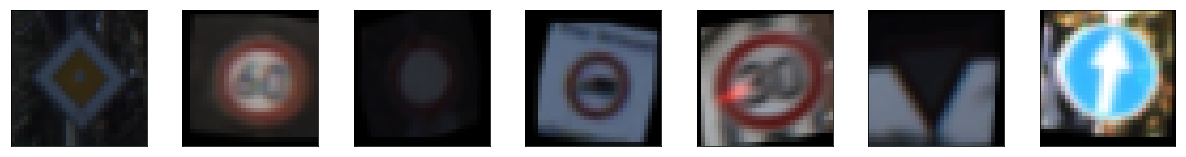

After processing:


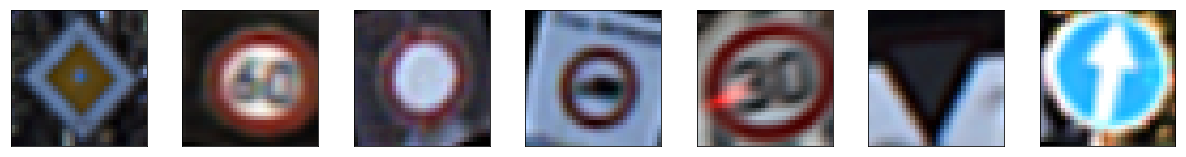

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


%matplotlib inline

PIXEL_COLORS = 3

image_data, randomIndexes = getRandomImages(7, X_train, y_train)
print("Before processing:")
plotImages(image_data, cols=7)
img_size=X_train.shape[1]

def normalizeImagePixels(image, oldmin, oldmax, newmin, newmax):
    oldrange = oldmax-oldmin
    newrange = newmax-newmin;
    scale = (image-oldmin)/oldrange;
    return (newrange*scale)+newmin

def process_single(image, grayscale = False):
    image = blur(image)
    image = zoom(image, 3)
    image= normalizeImagePixels(image, 0, 255, -1, 1)
    image = cv2.normalize(image, image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    image = image.reshape(image.shape[0], image.shape[1], 3)
    if grayscale is True:
        image = np.sum(image/3, axis=2, keepdims=True)
    return image

def preProcessDataSet(x, grayscale = False):
    return np.array([process_single(x[xi], grayscale = grayscale) for xi in range(0, len(x))])

X_train_preprocessed, y_procesed_labels = preProcessDataSet(X_train[randomIndexes, ::]), y_train[randomIndexes]
image_data = getImagesByIndexes(X_train_preprocessed, y_procesed_labels)
print("After processing:")
plotImages(image_data, cols=7)



### Model Architecture

There was considered 3 model architectures:

1) Net_1 is default LeNet model:

- 5x5 convolution (input:32x32x3 output:28x28x6)
- ReLU
- 2x2 max pool (input:28x28x6 output:14x14x6)
- 5x5 convolution (14x14x6 in, 10x10x16 out)
- ReLU
- 2x2 max pool (10x10x16 in, 5x5x16 out)
- Flatten output: 5x5x16 -> 400
- Fully connected layer (input: 400, output: 120 )
- ReLu
- Dropout
- Fully connected layer (input: 120, output: 84 )
- ReLu
- Dropout
- Fully connected layer (input: 84, output: 43 )

2) Net_2 is LeNet modification with more conv filters and 3 convolutional layers:

- 5x5 convolution (input:32x32x3 output:28x28x12)
- ReLU
- 2x2 max pool (input:28x28x12 output:14x14x12)
- 5x5 convolution (14x14x12 in, 10x10x32 out)
- ReLU
- 2x2 max pool (10x10x32 in, 5x5x32 out)
- 5x5 convolution (5x5x32 in, 4x4x64 out)
- ReLu
- Flatten output: 4x4x64 -> 1024
- Fully connected layer (input: 1024, output: 200 )
- ReLu
- Dropout
- Fully connected layer (input: 200, output: 43 )


3) Net_3 is LeNet modification with more conv filters and more neurons to fully connected layer:

- 5x5 convolution (input:32x32x3 output:28x28x32)
- ReLU
- 2x2 max pool (input:28x28x32 output:14x14x32)
- 5x5 convolution (14x14x32 in, 10x10x64 out)
- ReLU
- 2x2 max pool (10x10x64 in, 5x5x64 out)
- Flatten output: 5x5x64 -> 1600
- Fully connected layer (input: 1600, output: 300 )
- ReLu
- Dropout
- Fully connected layer (input: 300, output: 84 )
- ReLu
- Dropout
- Fully connected layer (input: 84, output: 43 )

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf


def convolutional_layer(_x, input_size, output_size, filter_size, stride, mu = 0, sigma = 0.1):
    conv_W = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, input_size, output_size), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(output_size))
    return tf.nn.conv2d(_x, conv_W, strides=[1, stride, stride, 1], padding='VALID') + conv_b
    
def dense_layer(_x, input_size, output_size, mu = 0, sigma = 0.1):    
    fc_W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(output_size))
    return tf.matmul(_x, fc_W) + fc_b

# Default LeNet
def Net_1(x, keep_prob_fc, num_classes, pixel_colors):
    conv1 = convolutional_layer(x, pixel_colors, 6, 5, 1)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    conv2 = convolutional_layer(conv1, 6, 16, 5, 1)    
    conv2 = tf.nn.relu(conv2)    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc1 = dense_layer(flatten(conv2), 400, 120)    
    fc1 = tf.nn.relu(fc1)    
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)

    fc2 = dense_layer(fc1, 120, 84)    
    fc2 = tf.nn.relu(fc2)    
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)
    
    return dense_layer(fc2, 84, num_classes)


# More filters in conv layer + one additional conv layer
def Net_2(x, keep_prob_fc, num_classes, pixel_colors):  
    
    conv1 = convolutional_layer(x, pixel_colors, 12, 5, 1)
    conv1 = tf.nn.relu(conv1)
    print(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv1)
    conv2 = convolutional_layer(conv1, 12, 32, 5, 1)    
    conv2 = tf.nn.relu(conv2)    
    print(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv2)

    conv3 = convolutional_layer(conv2, 32, 64, 2, 1)    
    conv3 = tf.nn.relu(conv3)
    print(conv3)

    fc0 = flatten(conv3)
    
    fc1 = dense_layer(fc0, 1024, 300)    
    fc1 = tf.nn.relu(fc1)    
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)

    fc2 = dense_layer(fc1, 300, 84)    
    fc2 = tf.nn.relu(fc2)    
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)
    
    return dense_layer(fc2, 84, num_classes) 

# More filters in conv layer and more neurons in fully connected
def Net_3(x, keep_prob_fc, num_classes, pixel_colors):  
    
    conv1 = convolutional_layer(x, pixel_colors, 32, 5, 1)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    conv2 = convolutional_layer(conv1, 32, 64, 5, 1)    
    conv2 = tf.nn.relu(conv2)    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc1 = dense_layer(flatten(conv2), 1600, 300)    
    fc1 = tf.nn.relu(fc1)    
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)

    fc2 = dense_layer(fc1, 300, 84)    
    fc2 = tf.nn.relu(fc2)    
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)
    
    return dense_layer(fc2, 84, num_classes)

### Train, Validate and Test the Model

Lets build a couple of functions for simple graph definition, model training and evaluation. They will be used in future to finetune models and try different options.

In [12]:
#Define parameters and placeholders

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

def constructModelPipeline(x, y, one_hot_y, keep_prob_fc, pixel_colors = PIXEL_COLORS, 
                           rate = 0.001, learning_func = Net_1):
    ### Train graph definition
    logits = learning_func(x, keep_prob_fc, n_classes, pixel_colors)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    train_operation = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss_operation)
    
    ### Evaluation graph definition
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
      
    return train_operation, accuracy_operation, logits

In [13]:
### Evaluation function
def evaluateModelPipeline(x_values, y_values, batch_size, accuracy_operation):
    total_values = len(y_values)
    total_accuracy = 0
    sess = tf.get_default_session()    
    for offset in range(0, total_values, batch_size):
        x_values_batch, y_values_batch = x_values[offset : offset + batch_size], y_values[offset : offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_values_batch, y: y_values_batch, keep_prob_fc: 1})
        total_accuracy += accuracy * len(x_values_batch);
    return total_accuracy / total_values

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Train graph definition

from sklearn.metrics import average_precision_score

x = tf.placeholder(tf.float32, (None, 32, 32, PIXEL_COLORS))
y = tf.placeholder(tf.int32, (None))    
keep_prob_fc = tf.placeholder(tf.float32)

savers = {}
learnCounter = {}

### Train graph execution
def trainModel(model_name, data, epochs = 10, batch_size = 64, train_keep_prob_fc = 1, 
               rate = 0.001, model_func = Net_1, margin_validation_accuracy = 0.99):
    
    
    one_hot_y = tf.one_hot(y, n_classes)
    
    train_operation, accuracy_operation, logits = constructModelPipeline(x, y, one_hot_y, 
                                                                         train_keep_prob_fc,
                                                                         rate = rate,
                                                                         learning_func = model_func)
    
    X_train = data['X_train']
    y_train = data['y_train']
    X_valid = data['X_valid']
    y_valid = data['y_valid']
    
    epochs_curve = []
    train_curve = []
    validation_curve = []
    validation_predictions = []

    
    with tf.Session() as sess:       
           
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)        
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]            
                sess.run(train_operation, feed_dict={x: batch_x, 
                                                     y: batch_y, 
                                                     keep_prob_fc: train_keep_prob_fc })

            training_accuracy = evaluateModelPipeline(X_train, y_train, batch_size, accuracy_operation) 
            validation_accuracy = evaluateModelPipeline(X_valid, y_valid, batch_size, accuracy_operation)  
            epochs_curve.append(i)
            train_curve.append(training_accuracy)
            validation_curve.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1) + " | Training Accuracy = {:.3f}".format(training_accuracy) + " | Validation Accuracy = {:.3f}".format(validation_accuracy))
            print() 
            if validation_accuracy >= margin_validation_accuracy:
                break
        counter = learnCounter.get(model_name, None)   
        if counter is None:
            counter = 1
        else:
            counter = counter + 1    
        tf.add_to_collection("predict_op_" + model_name + "_" + str(counter), logits)
        saver = tf.train.Saver()        
        saver.save(sess, './models/' + model_name + '.ckpt')
        learnCounter[model_name] = counter
        print("Model saved")        
        return (epochs_curve, train_curve, validation_curve) 

In [15]:
import sklearn as sk
from sklearn.metrics import accuracy_score
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    
def calculate_accuracy_percision_recall(modelName, x_t, y_t, batch_size = None, n_classes = n_classes, sign_names = signNames):
    if batch_size is None:
        batch_size = len(x_t)
    results = []    

    with tf.Session() as sess:        
        saver = tf.train.Saver()
        saver.restore(sess, './models/'+modelName+'.ckpt')
        counter = learnCounter[modelName]
        predict_op = tf.get_collection("predict_op_" + modelName + "_" + str(counter))[0]
        y_pred = sess.run(predict_op, feed_dict={x: preProcessDataSet(x_t), keep_prob_fc: 1})
        y_pred = np.argmax(y_pred, axis = 1)
        return accuracy_score(y_t, y_pred), classification_report(y_t, y_pred, target_names = sign_names)


def buildLearningCurve(learning_curve):
    epochs, train, valid = learning_curve
    plt.figure(figsize=(10, 10))
    plt.plot(epochs, train, label='train')
    plt.plot(epochs, valid, label='validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.xticks(epochs)
    plt.title('Learning Curve')
    plt.legend(loc='center right')    



### Net_1 (Default LeNet)

Lets try to run defult LeNet model for our training set. I have tried to run it with different learning rate values (0.002, 0.01, 0.0001) and it looks like optimal learning rate for weights correction is 0.001. 
Batch size = 128.

Training...

EPOCH 1 ... | Training Accuracy = 0.892 | Validation Accuracy = 0.903

EPOCH 2 ... | Training Accuracy = 0.940 | Validation Accuracy = 0.920

EPOCH 3 ... | Training Accuracy = 0.966 | Validation Accuracy = 0.943

EPOCH 4 ... | Training Accuracy = 0.967 | Validation Accuracy = 0.952

EPOCH 5 ... | Training Accuracy = 0.976 | Validation Accuracy = 0.945

EPOCH 6 ... | Training Accuracy = 0.981 | Validation Accuracy = 0.956

EPOCH 7 ... | Training Accuracy = 0.984 | Validation Accuracy = 0.942

EPOCH 8 ... | Training Accuracy = 0.987 | Validation Accuracy = 0.956

EPOCH 9 ... | Training Accuracy = 0.987 | Validation Accuracy = 0.945

EPOCH 10 ... | Training Accuracy = 0.990 | Validation Accuracy = 0.957

Model saved


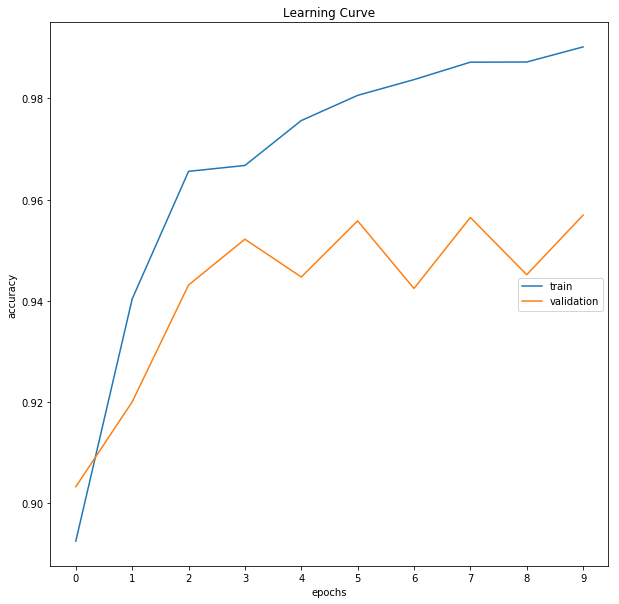

In [17]:
learning_curve = trainModel('lenet_simple', {'X_train' : preProcessDataSet(X_train), 'y_train' : y_train, 
                           'X_valid' : preProcessDataSet(X_valid), 'y_valid' : y_valid }, 
           epochs = 10, batch_size = 128, train_keep_prob_fc = 1, 
           rate = 0.001, model_func = Net_1)

buildLearningCurve(learning_curve)




In [18]:
accuracy, metrics_data = calculate_accuracy_percision_recall('lenet_simple', X_test, y_test)
print()
print("Accuracy for test set: {:6.2f}%".format(accuracy * 100))
print()
print("Metrics for test set: ")
print(metrics_data)
print()


Accuracy for test set:  94.86%

Metrics for test set: 
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.95      0.98      0.97        60
                              Speed limit (30km/h)       0.96      0.99      0.97       720
                              Speed limit (50km/h)       0.94      0.96      0.95       750
                              Speed limit (60km/h)       0.95      0.97      0.96       450
                              Speed limit (70km/h)       0.99      0.96      0.97       660
                              Speed limit (80km/h)       0.96      0.90      0.93       630
                       End of speed limit (80km/h)       0.99      0.92      0.96       150
                             Speed limit (100km/h)       0.96      0.91      0.93       450
                             Speed limit (120km/h)       0.93      0.98      0.95       450
                       

Default LeNet model has showed nice results. Validation accuracy = 95,7%, test accuracy = 94,86%. Maybe we can get better results adding dropout?


### Net_1 (Simple LeNet with dropout 0.75)

Lets try to add dropout to default LeNet model and see if accuracy will increase. Keep propapility is 0.75

Training...

EPOCH 1 ... | Training Accuracy = 0.818 | Validation Accuracy = 0.852

EPOCH 2 ... | Training Accuracy = 0.882 | Validation Accuracy = 0.896

EPOCH 3 ... | Training Accuracy = 0.913 | Validation Accuracy = 0.922

EPOCH 4 ... | Training Accuracy = 0.929 | Validation Accuracy = 0.932

EPOCH 5 ... | Training Accuracy = 0.940 | Validation Accuracy = 0.932

EPOCH 6 ... | Training Accuracy = 0.942 | Validation Accuracy = 0.934

EPOCH 7 ... | Training Accuracy = 0.950 | Validation Accuracy = 0.940

EPOCH 8 ... | Training Accuracy = 0.958 | Validation Accuracy = 0.948

EPOCH 9 ... | Training Accuracy = 0.963 | Validation Accuracy = 0.948

EPOCH 10 ... | Training Accuracy = 0.965 | Validation Accuracy = 0.954

Model saved


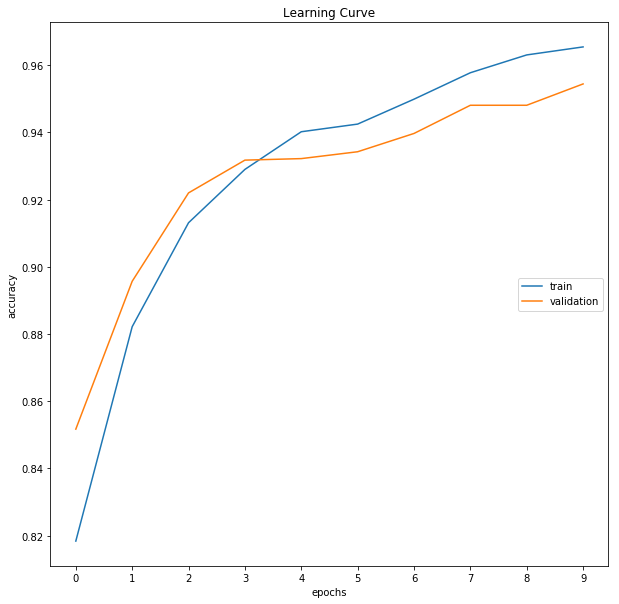

In [19]:
learning_curve = trainModel('lenet_dropout_075', {'X_train' : preProcessDataSet(X_train), 'y_train' : y_train, 
                            'X_valid' : preProcessDataSet(X_valid), 'y_valid' : y_valid }, 
           epochs = 10, batch_size = 128, train_keep_prob_fc = 0.75, 
           rate = 0.001, model_func = Net_1)

buildLearningCurve(learning_curve)


In [20]:

accuracy, metrics_data = calculate_accuracy_percision_recall('lenet_dropout_075', X_test, y_test)
print()
print("Accuracy for test set: {:6.2f}%".format(accuracy * 100))
print()
print("Metrics for test set: ")
print(metrics_data)
print()


Accuracy for test set:  94.16%

Metrics for test set: 
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.82      0.92      0.87        60
                              Speed limit (30km/h)       0.94      0.99      0.96       720
                              Speed limit (50km/h)       0.92      0.98      0.95       750
                              Speed limit (60km/h)       0.95      0.94      0.94       450
                              Speed limit (70km/h)       0.98      0.95      0.97       660
                              Speed limit (80km/h)       0.91      0.90      0.90       630
                       End of speed limit (80km/h)       0.98      0.94      0.96       150
                             Speed limit (100km/h)       0.95      0.93      0.94       450
                             Speed limit (120km/h)       0.95      0.95      0.95       450
                       

If we can see dropout has a little bit decreased accuracy on validation and test set (95,4% and 94,16%). But this is not significatnt change and only 10 epochs is too few for using dropout. So, I think we can use it for next models.


### Net_2 (LeNet modification with more conv filters and 3 convolutional layers)

The next model is modified LeNet model. I have added 3-d conv layer and more convolutional filters to see how it will impact network performance. Also batch size is decreased to 64 and dropout is being used with keep probability 0.75. Number of epochs was increased as well.

Tensor("Relu:0", shape=(?, 28, 28, 12), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 12), dtype=float32)
Tensor("Relu_1:0", shape=(?, 10, 10, 32), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 5, 5, 32), dtype=float32)
Tensor("Relu_2:0", shape=(?, 4, 4, 64), dtype=float32)
Training...

EPOCH 1 ... | Training Accuracy = 0.948 | Validation Accuracy = 0.948

EPOCH 2 ... | Training Accuracy = 0.976 | Validation Accuracy = 0.967

EPOCH 3 ... | Training Accuracy = 0.982 | Validation Accuracy = 0.975

EPOCH 4 ... | Training Accuracy = 0.981 | Validation Accuracy = 0.972

EPOCH 5 ... | Training Accuracy = 0.987 | Validation Accuracy = 0.968

EPOCH 6 ... | Training Accuracy = 0.988 | Validation Accuracy = 0.973

EPOCH 7 ... | Training Accuracy = 0.991 | Validation Accuracy = 0.979

EPOCH 8 ... | Training Accuracy = 0.993 | Validation Accuracy = 0.982

EPOCH 9 ... | Training Accuracy = 0.991 | Validation Accuracy = 0.972

EPOCH 10 ... | Training Accuracy = 0.993 | Validation Accuracy = 

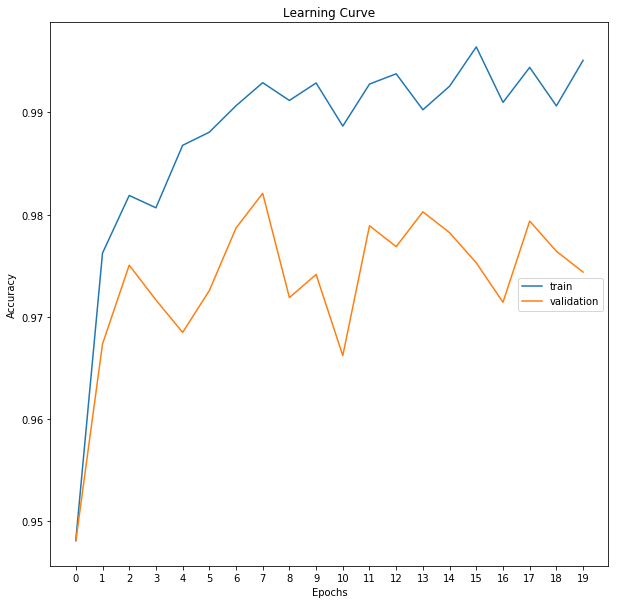

In [16]:
learning_curve = trainModel('more_conv_layers_and_filters_model', {'X_train' : preProcessDataSet(X_train), 'y_train' : y_train, 
                            'X_valid' : preProcessDataSet(X_valid), 'y_valid' : y_valid }, 
           epochs = 20, batch_size = 64, train_keep_prob_fc = 0.75, 
           rate = 0.001, model_func = Net_2, margin_validation_accuracy = 0.99)

buildLearningCurve(learning_curve)


In [17]:
accuracy, metrics_data = calculate_accuracy_percision_recall('more_conv_layers_and_filters_model', X_test, y_test)
print("\n")
print("Accuracy for test set: {:6.2f}%".format(accuracy * 100))
print("\n")
print("Metrics for test set: ")
print(metrics_data)
print("\n")



Accuracy for test set:  96.37%


Metrics for test set: 
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.95      0.90      0.92        60
                              Speed limit (30km/h)       0.98      0.99      0.99       720
                              Speed limit (50km/h)       0.97      0.99      0.98       750
                              Speed limit (60km/h)       1.00      0.92      0.96       450
                              Speed limit (70km/h)       1.00      0.98      0.99       660
                              Speed limit (80km/h)       0.92      0.96      0.94       630
                       End of speed limit (80km/h)       0.97      0.97      0.97       150
                             Speed limit (100km/h)       0.99      0.95      0.97       450
                             Speed limit (120km/h)       0.95      0.99      0.97       450
                     

Model Net_2 (modified LeNet) shows performance gain in compare to simple lenet. Validation accuracy is 97,4%, test accuracy is 96,37%. Maybe adding more epochs can help the model obtain even better results.


### Net_3 (More conv filters and neurons in fully connected, more epochs)

The next model is also modified LeNet model. Number of convolutional filters was increased and number of neurons in fully connected layer is incresed as well. Batch size is the same as for previous model - 64 and dropout is being used with keep probability 0.75

Training...

EPOCH 1 ... | Training Accuracy = 0.963 | Validation Accuracy = 0.959

EPOCH 2 ... | Training Accuracy = 0.976 | Validation Accuracy = 0.960

EPOCH 3 ... | Training Accuracy = 0.987 | Validation Accuracy = 0.979

EPOCH 4 ... | Training Accuracy = 0.990 | Validation Accuracy = 0.977

EPOCH 5 ... | Training Accuracy = 0.988 | Validation Accuracy = 0.973

EPOCH 6 ... | Training Accuracy = 0.989 | Validation Accuracy = 0.976

EPOCH 7 ... | Training Accuracy = 0.993 | Validation Accuracy = 0.979

EPOCH 8 ... | Training Accuracy = 0.993 | Validation Accuracy = 0.978

EPOCH 9 ... | Training Accuracy = 0.994 | Validation Accuracy = 0.979

EPOCH 10 ... | Training Accuracy = 0.994 | Validation Accuracy = 0.978

EPOCH 11 ... | Training Accuracy = 0.990 | Validation Accuracy = 0.972

EPOCH 12 ... | Training Accuracy = 0.996 | Validation Accuracy = 0.984

EPOCH 13 ... | Training Accuracy = 0.992 | Validation Accuracy = 0.981

EPOCH 14 ... | Training Accuracy = 0.995 | Validation Accura

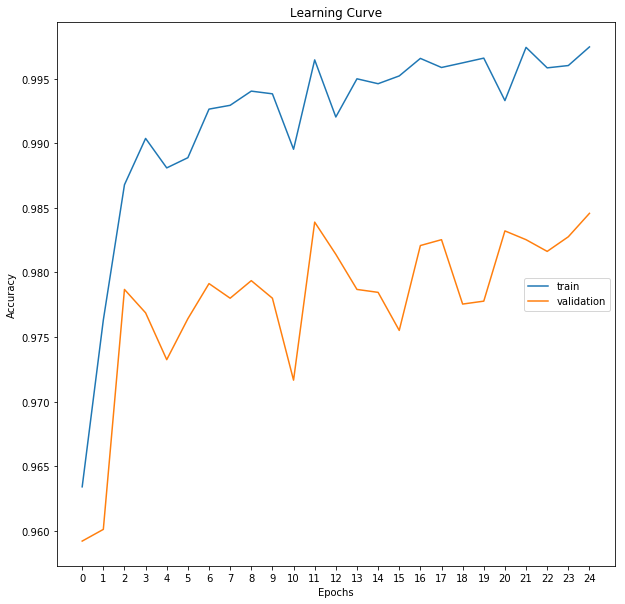

In [22]:
learning_curve = trainModel('more_filters_and_neurons_model_3', {'X_train' : preProcessDataSet(X_train), 'y_train' : y_train, 
                            'X_valid' : preProcessDataSet(X_valid), 'y_valid' : y_valid }, 
           epochs = 25, batch_size = 64,  train_keep_prob_fc = 0.75, 
           rate = 0.001, model_func = Net_3, margin_validation_accuracy = 0.99)

buildLearningCurve(learning_curve)


In [23]:
accuracy, metrics_data = calculate_accuracy_percision_recall('more_filters_and_neurons_model_3', X_test, y_test)
print("\n")
print("Accuracy for test set: {:6.2f}%".format(accuracy * 100))
print("\n")
print("Metrics for test set: ")
print(metrics_data)
print("\n")



Accuracy for test set:  97.73%


Metrics for test set: 
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.95      0.98      0.97        60
                              Speed limit (30km/h)       0.98      1.00      0.99       720
                              Speed limit (50km/h)       0.99      0.99      0.99       750
                              Speed limit (60km/h)       0.98      0.96      0.97       450
                              Speed limit (70km/h)       1.00      0.98      0.99       660
                              Speed limit (80km/h)       0.94      0.98      0.96       630
                       End of speed limit (80km/h)       0.98      0.95      0.96       150
                             Speed limit (100km/h)       0.98      0.97      0.98       450
                             Speed limit (120km/h)       0.99      0.99      0.99       450
                     

As we can see above learned model has showed good results for validation set (98,5% accuracy) and for test set (97,73% accuracy). Maybe adding more epochs can help the model obtain even better results.

So the model does not looks like overfitted and it should work properly for new example. Below we will examine this model with new examples.

### Net_3 with graysclaed images

Also, I have tried to learn Net_3 model with grayscaled images. Performance is still the same as for colored images. No significant gain. But loosing of color feature can make performance for new images a bit lower.

Training...

EPOCH 1 ... | Training Accuracy = 0.947 | Validation Accuracy = 0.959

EPOCH 2 ... | Training Accuracy = 0.971 | Validation Accuracy = 0.968

EPOCH 3 ... | Training Accuracy = 0.977 | Validation Accuracy = 0.976

EPOCH 4 ... | Training Accuracy = 0.987 | Validation Accuracy = 0.983

EPOCH 5 ... | Training Accuracy = 0.988 | Validation Accuracy = 0.981

EPOCH 6 ... | Training Accuracy = 0.990 | Validation Accuracy = 0.977

EPOCH 7 ... | Training Accuracy = 0.991 | Validation Accuracy = 0.985

EPOCH 8 ... | Training Accuracy = 0.993 | Validation Accuracy = 0.982

EPOCH 9 ... | Training Accuracy = 0.994 | Validation Accuracy = 0.984

EPOCH 10 ... | Training Accuracy = 0.995 | Validation Accuracy = 0.981

Model saved


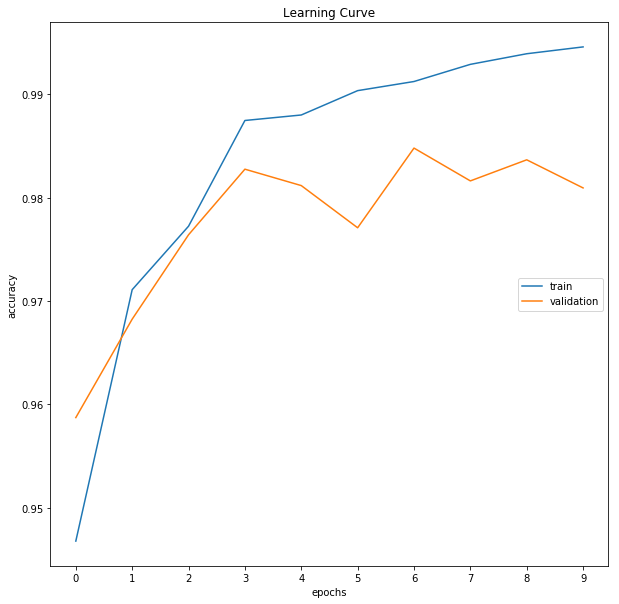

In [74]:
learning_curve = trainModel('more_filters_and_neurons_model_grayscale', {'X_train' : preProcessDataSet(X_train, grayscale = True), 'y_train' : y_train, 
                            'X_valid' : preProcessDataSet(X_valid, grayscale = True), 'y_valid' : y_valid }, 
           epochs = 10, batch_size = 64,  train_keep_prob_fc = 0.75, 
           rate = 0.001, model_func = Net_3, margin_validation_accuracy = 0.987)

buildLearningCurve(learning_curve)


In [20]:
accuracy, metrics_data = calculate_accuracy_percision_recall('more_filters_and_neurons_model_grayscale', X_test, y_test)
print("\n")
print("Accuracy for test set: {:6.2f}%".format(accuracy * 100))
print("\n")
print("Metrics for test set: ")
print(metrics_data)
print("\n")



Accuracy for test set:  97.51%


Metrics for test set: 
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.98      0.99        60
                              Speed limit (30km/h)       0.96      1.00      0.98       720
                              Speed limit (50km/h)       0.96      0.99      0.97       750
                              Speed limit (60km/h)       0.98      0.96      0.97       450
                              Speed limit (70km/h)       0.99      0.99      0.99       660
                              Speed limit (80km/h)       0.98      0.93      0.95       630
                       End of speed limit (80km/h)       0.96      0.95      0.96       150
                             Speed limit (100km/h)       0.99      0.98      0.98       450
                             Speed limit (120km/h)       0.98      0.99      0.99       450
                     

---

## Step 3: Test a Model on New Images

Now I am going to estimate the quality of learned model testing it on:

1) Entire test set

2) 15 random images from test set and visualize results

3) Most important - for random new traffic signs images from web.

4) Visualize TOP5 probabilities for new images from web

### Load and Output the Images

Random images from test set: 


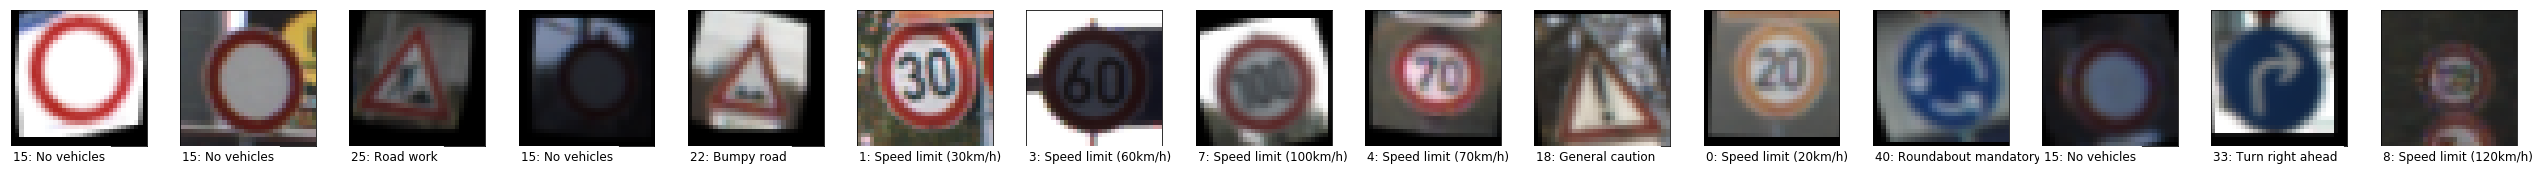

Images downloaded from web (German traffic sign dataset): 


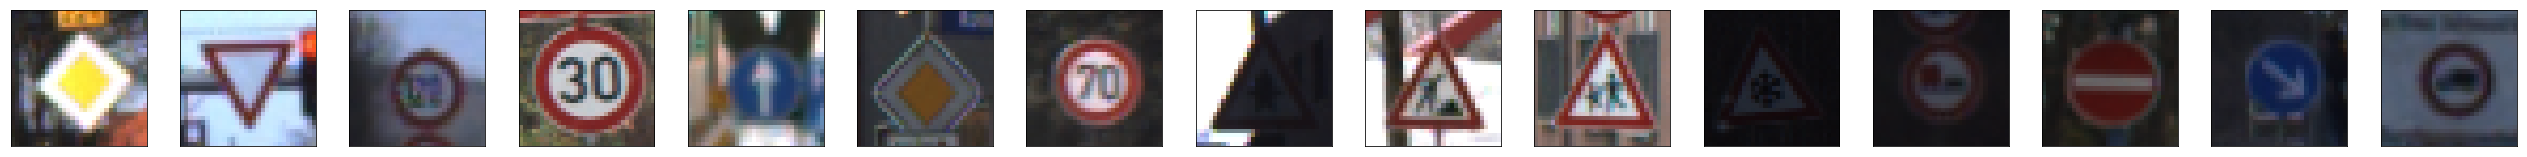

Random images from web: 


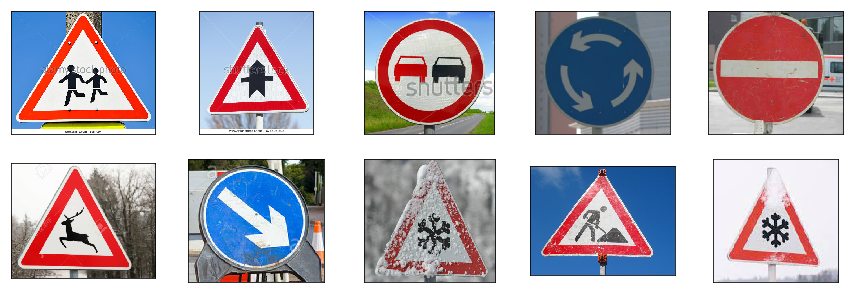

In [68]:
##### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

print("Random images from test set: ")

random_test_images, randomIndexes = getRandomImages(15, X_train, y_train)
plotImages(random_test_images, cols=15, sign_names = signNames)

print("Images downloaded from web (German traffic sign dataset): ")

test_images_from_web_gts = np.array([(cv2.resize(plt.imread('test_examples_gts/' + filename), (32, 32)), None) for filename in os.listdir('test_examples_gts')])
plotImages(test_images_from_web_gts, cols=15)

test_images_from_web_gts = np.array([img[0] for img in test_images_from_web_gts])

print("Random images from web: ")

test_images_from_web_origin = np.array([(plt.imread('test_examples_web/' + filename), None) for filename in os.listdir('test_examples_web')])
plotImages(test_images_from_web_origin, cols=5)

test_images_from_web_origin = np.array([img[0] for img in test_images_from_web_origin])

test_images_from_web = np.array([(cv2.resize(img, (32, 32)), None) for img in test_images_from_web_origin])

test_images_from_web = np.array([img[0] for img in test_images_from_web])


### Predict the Sign Type for Each Image

### Run model for entire test set

Firstly i am going to run model for entire test set and see what is it's accuracy

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

accuracy, metrics_data = calculate_accuracy_percision_recall('more_filters_and_neurons_model_3', X_test, y_test)
print("\n")
print("Accuracy for test set: {:6.2f}%".format(accuracy * 100))
print("\n")
print("Metrics for test set: ")
print(metrics_data)
print("\n")




Accuracy for test set:  97.82%


Metrics for test set: 
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.98      1.00      0.99        60
                              Speed limit (30km/h)       0.98      1.00      0.99       720
                              Speed limit (50km/h)       0.99      0.99      0.99       750
                              Speed limit (60km/h)       0.98      0.97      0.98       450
                              Speed limit (70km/h)       1.00      0.99      0.99       660
                              Speed limit (80km/h)       0.95      0.98      0.96       630
                       End of speed limit (80km/h)       0.99      0.93      0.96       150
                             Speed limit (100km/h)       0.98      0.98      0.98       450
                             Speed limit (120km/h)       0.99      0.98      0.99       450
                     

Accuracy is 97.87%. Not bad for test set. The lowest percission we have for "Pedestrians" traffic sign - 0.76. Maybe should be added more examples for this sign into training set to improve the model

### Run model for 15 images from test set (German traffic signs images set)

Lets select 15 random images from German trafic signs test set, run classifier for them and visualize results.

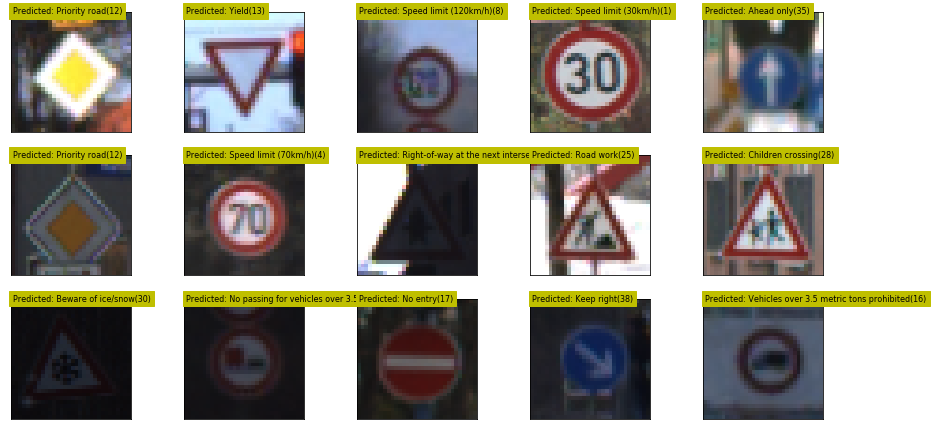

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    #First let's load meta graph and restore weights
    #sess.run(tf.global_variables_initializer())
    
    modelName = 'more_filters_and_neurons_model_3'

    saver = tf.train.Saver() 
    
    saver.restore(sess, './models/' + modelName + '.ckpt')
    
    counter = learnCounter[modelName]
    predict_op = tf.get_collection("predict_op_" + modelName + "_" + str(counter))[0]
    
    test_set_x = preProcessDataSet(test_images_from_web_gts)
    predictions = sess.run(predict_op, feed_dict={x: test_set_x, keep_prob_fc: 1})
    
    predictions = np.argmax(predictions, axis=1)
    
    zipped = list(zip(test_images_from_web_gts, predictions))
    plotImages(zipped, cols=5, sign_names = signNames, predictions = True)  


How we can see above accuracy for 15 random images from Geraman traffic signs test set is 100%!
All signs are classified correctly.
But now we should test model for new web images.

### Run model for random 5 web images (show top 5 scores) and Analyze Performance

Lets run Net_3 Model for 10 random traffic signs images from web and see what accuracy will be.

[28 11  9 40 17 31 38 23 25 30]


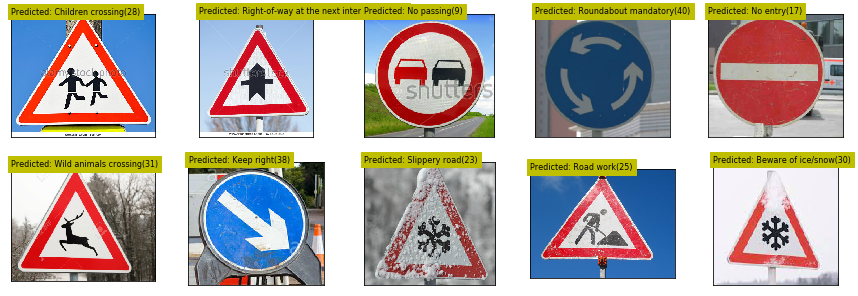

Random web images set Accuracy = 0.900


In [70]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

predictions_matrix = None

with tf.Session() as sess:
    modelName = 'more_filters_and_neurons_model_3'

    saver = tf.train.Saver() 
    
    saver.restore(sess, './models/' + modelName + '.ckpt')
    
    counter = learnCounter[modelName]
    predict_op = tf.get_collection("predict_op_" + modelName + "_" + str(counter))[0]
    
    test_set_x = preProcessDataSet(test_images_from_web)
    predictions_matrix = sess.run(tf.nn.softmax(predict_op), feed_dict={x: test_set_x, keep_prob_fc: 1})
    
    predictions = np.argmax(predictions_matrix, axis=1)
    print(predictions)
    
    zipped = list(zip(test_images_from_web_origin, predictions))
    plotImages(zipped, cols=5, sign_names = signNames, predictions = True)  
    
    ### Calculate the accuracy for these 5 new images. 
    ### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
    labels_web = np.array([28, 11, 9, 40, 17, 31, 38, 30, 25, 30])
 
    web_accuracy = accuracy_score(labels_web, predictions)

    print("Random web images set Accuracy = {:.3f}".format(web_accuracy))


We have obtained quite good accuracy for unknown test images set (90%).
Most of traffic signs are classified correct.
But accuracy for random images is less than test set accuracy.
There are some missclasifications with separate specific images, for example with trafic sign covered by snow.
It is caused by fact of relativly small and restricted training set and missing of some specific cases there.
So expansion of training set with more complex examples should improve network performance. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Lets show TOP 5 classes probabilities for random traffic signs images:

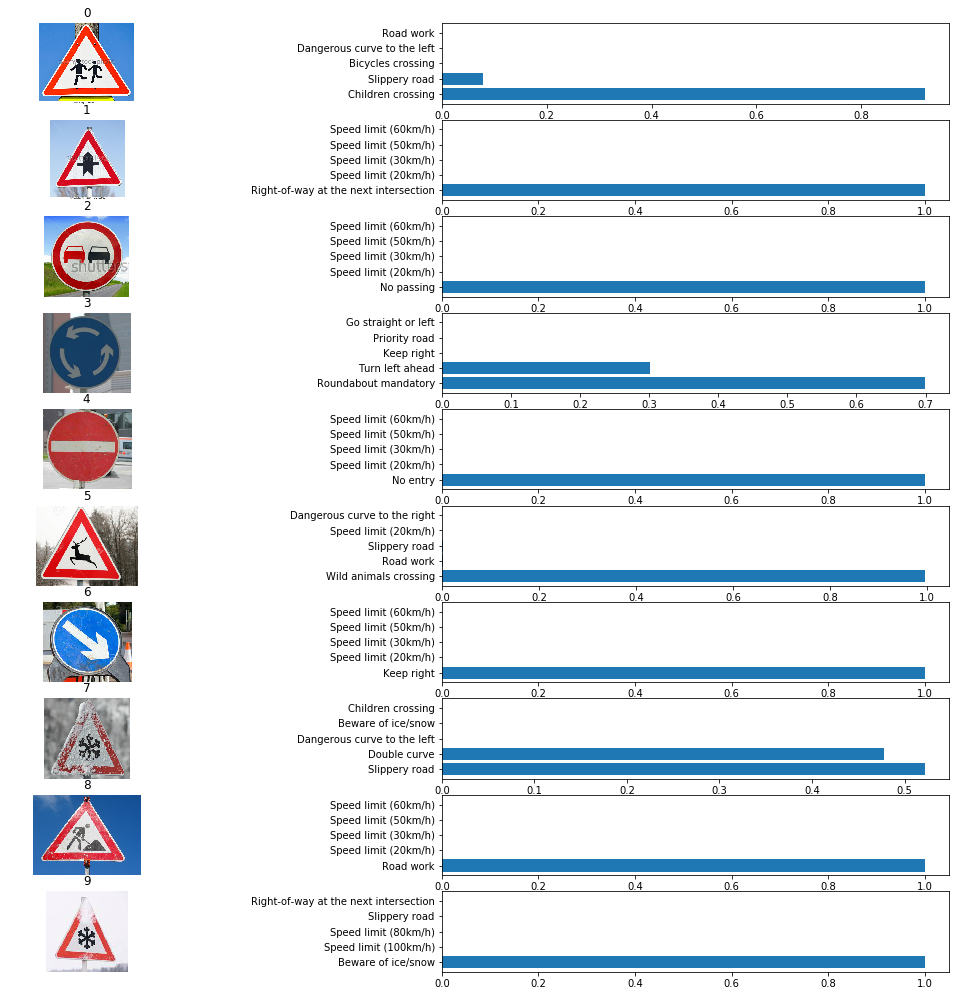

In [71]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top5_softmax_values= sess.run(tf.nn.top_k(tf.constant(predictions_matrix), k=5))    

    top5_softmax_indices = top5_softmax_values.indices
    top5_softmax_values = np.around(top5_softmax_values.values, decimals = 3)    
   
    rows = len(test_images_from_web_origin)
    plt.figure(figsize=(20, 21))
    i = 0
    for image in test_images_from_web_origin:
        plt.subplot(12, 2, 2*i+1)
        plt.imshow(image) 
        plt.title(i)
        plt.axis('off')
        plt.subplot(12, 2, 2*i+2)        
        labs=[signNames[j] for j in top5_softmax_indices[i]]
        plt.barh(np.arange(1, 6, 1), top5_softmax_values[i, :])
        plt.yticks(np.arange(1, 6, 1), labs)            
        i= i + 1



As we can see above the model is quite certain of its predictions. 
In most cases the single class takes totally leadership.
There was some uncertainity for case 1 and case 4. 
Traffic sign in case 4 (Roundabout mandatory) realy has some patterns of "Turn left ahead" sign (left arrow).
Also, traffic sign in case 1 (Children crossing) realy has some elements of "Slippery road" sign (childrens shapes are quite similar to two paralel zigzag lines :)).

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")